In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [6]:
# Load image 'data/dog.bmp'
# Blur each channel with a 5-by-5 Gaussian kernel
# Construct the next level of Gaussian pyramid by discarding every other row or column

Shape of I = (512, 512, 3)
Shape of I2 = (256, 256, 3)


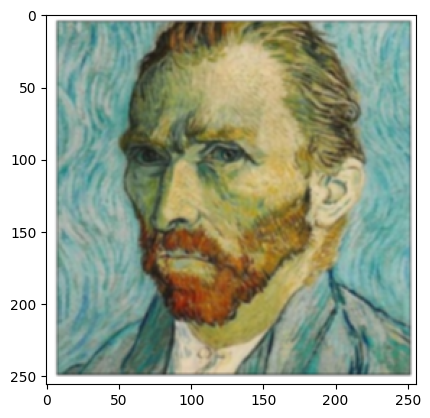

In [7]:
I = cv.imread('data/dog.bmp')
I = cv.imread('data/van-gogh.jpg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
I = cv.resize(I, (512, 512))

print('Shape of I = {}'.format(I.shape))

I[:,:,0] = cv.GaussianBlur(I[:,:,0], (5,5), 2, 2)
I[:,:,1] = cv.GaussianBlur(I[:,:,1], (5,5), 2, 2)
I[:,:,2] = cv.GaussianBlur(I[:,:,2], (5,5), 2, 2)

I2 = I[::2,::2,:]
print('Shape of I2 = {}'.format(I2.shape))

plt.imshow(I2);

In [8]:
# Gaussian Image Pyramid

In [9]:
def gen_gaussian_pyramid(I, levels=6):
    G = I.copy()
    gpI = [G]
    for i in range(levels):
        G = cv.pyrDown(G)
        gpI.append(G)
    return gpI

In [10]:
def gen_pyramid(I, levels=6):
    G = I.copy()
    pI = [G]
    for i in range(levels):
        G = G[::2,::2,:]
        pI.append(G)
    return pI

In [11]:
foo = gen_gaussian_pyramid(I, levels=9)
boo = gen_pyramid(I, levels=9)

for i in foo:
    print(i.shape)

for i in boo:
    print(i.shape)

(512, 512, 3)
(256, 256, 3)
(128, 128, 3)
(64, 64, 3)
(32, 32, 3)
(16, 16, 3)
(8, 8, 3)
(4, 4, 3)
(2, 2, 3)
(1, 1, 3)
(512, 512, 3)
(256, 256, 3)
(128, 128, 3)
(64, 64, 3)
(32, 32, 3)
(16, 16, 3)
(8, 8, 3)
(4, 4, 3)
(2, 2, 3)
(1, 1, 3)


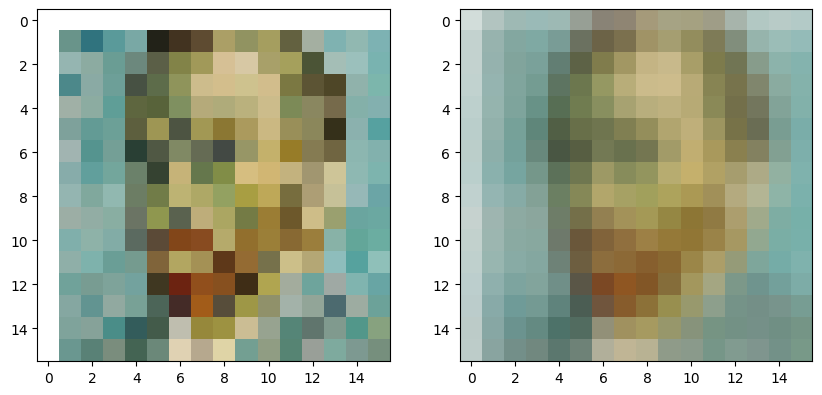

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(boo[5])        
plt.subplot(122)
plt.imshow(foo[5])

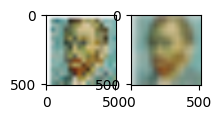

In [13]:
plt.figure(figsize=(2,1))
plt.subplot(121)
plt.imshow(cv.resize(boo[5], (512,512))) 
plt.subplot(122)
plt.imshow(cv.resize(foo[5], (512,512))) 

In [14]:
A = cv.imread('data/einstein.bmp')
B = cv.imread('data/marilyn.bmp')
A = cv.resize(A, (2048, 2048))
B = cv.resize(B, (2048, 2048))
A = cv.cvtColor(A, cv.COLOR_BGR2RGB)
B = cv.cvtColor(B, cv.COLOR_BGR2RGB)

In [15]:
gpA = gen_gaussian_pyramid(A)
gpB = gen_gaussian_pyramid(B)

In [16]:
gp = gpB
num_levels = len(gp)
for i in range(num_levels):
    rows = gp[i].shape[0]
    cols = gp[i].shape[1]
    print('level={}: size={}x{}'.format(i, rows, cols))

level=0: size=2048x2048
level=1: size=1024x1024
level=2: size=512x512
level=3: size=256x256
level=4: size=128x128
level=5: size=64x64
level=6: size=32x32


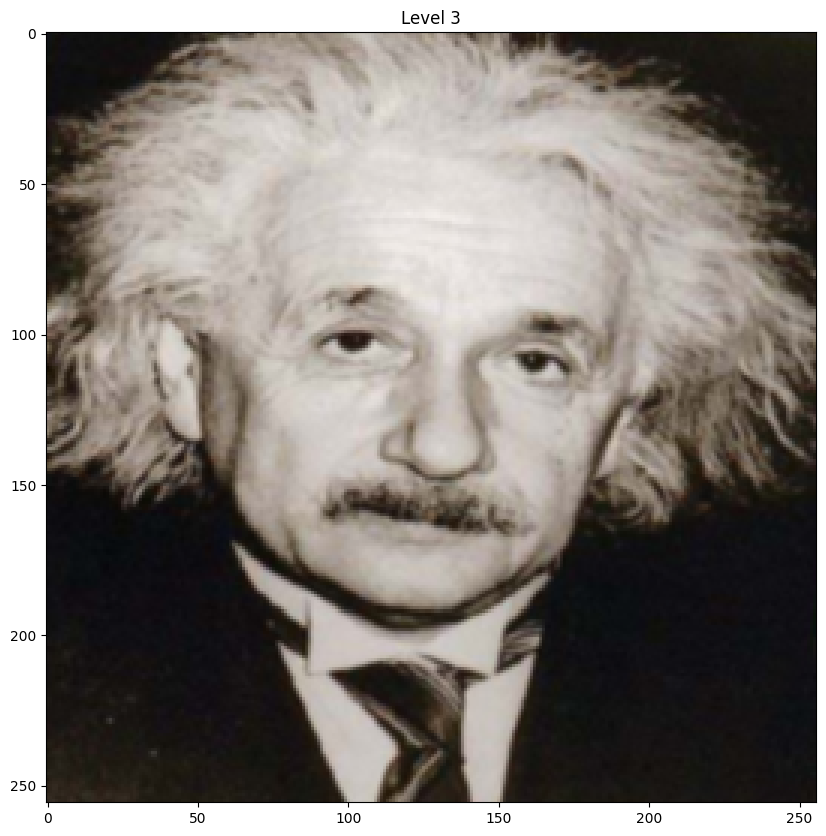

In [17]:
gp = gpA
level = 3
plt.figure(figsize=(10,10))
plt.title('Level {}'.format(level))
plt.imshow(gp[level])

In [18]:
# Laplacian Image Pyramid

In [19]:
def gen_laplacian_pyramid(gpI):
    """gpI is a Gaussian pyramid generated using gen_gaussian_pyramid method found in py file of the same name."""
    num_levels = len(gpI)-1
    lpI = [gpI[num_levels]]
    for i in range(num_levels,0,-1):
        GE = cv.pyrUp(gpI[i])
        L = cv.subtract(gpI[i-1],GE)
        lpI.append(L)
    return lpI

In [20]:
lpA = gen_laplacian_pyramid(gpA)
lpB = gen_laplacian_pyramid(gpB)

In [21]:
lp = lpA
num_levels = len(lp)
for i in range(num_levels):
    rows = lp[i].shape[0]
    cols = lp[i].shape[1]
    print('level={}: size={}x{}'.format(i, cols, rows))

level=0: size=32x32
level=1: size=64x64
level=2: size=128x128
level=3: size=256x256
level=4: size=512x512
level=5: size=1024x1024
level=6: size=2048x2048


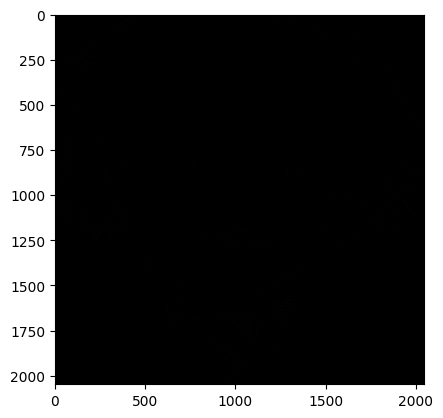

In [22]:
plt.imshow(lp[6])

In [23]:
# Laplacian Blending

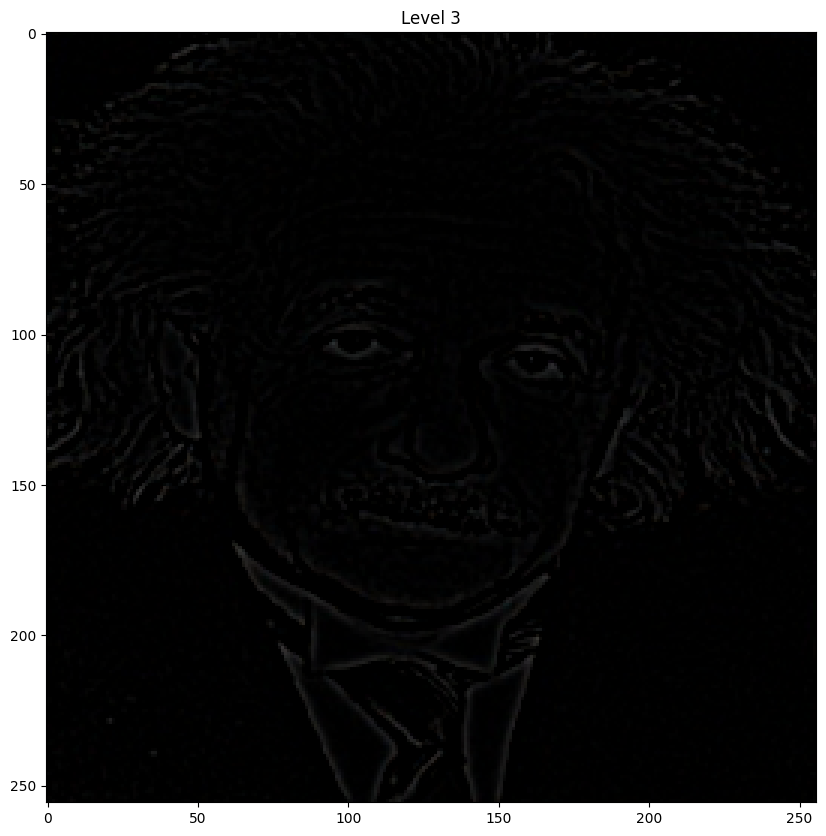

In [24]:
lp = lpA
level = 3
plt.figure(figsize=(10,10))
plt.title('Level {}'.format(level))
plt.imshow(lp[level]);

In [25]:
LS = []
for la, lb in zip(lpA, lpB):
    rows, cols, dpt = la.shape
    ls = np.hstack((la[:,0:cols//2,:], lb[:,cols//2:,:]))
    LS.append(ls)

In [26]:
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])

In [27]:
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

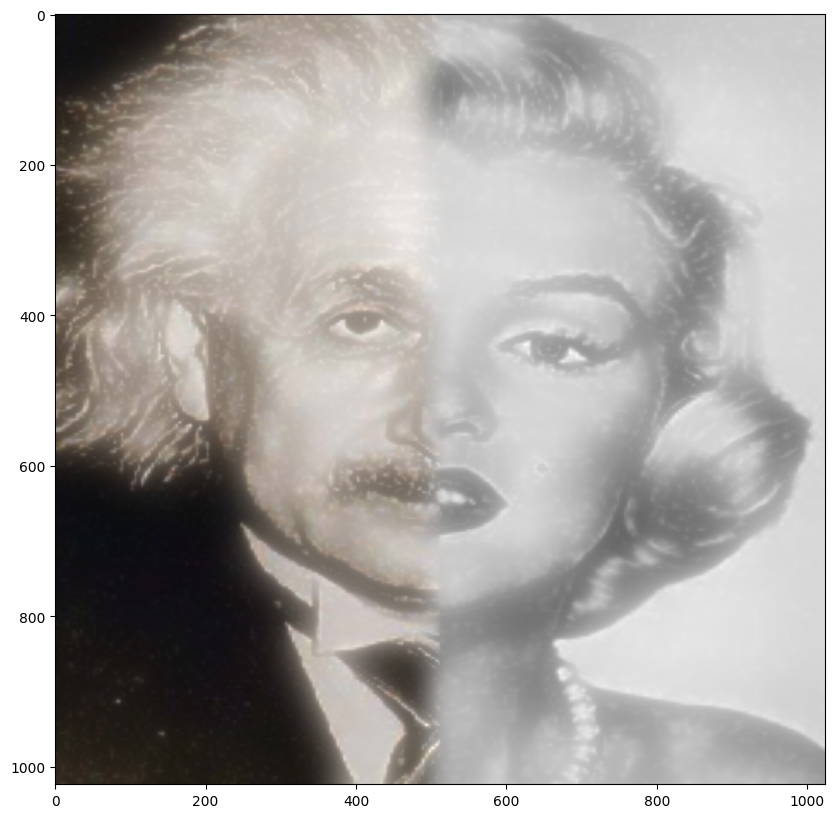

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(ls_)

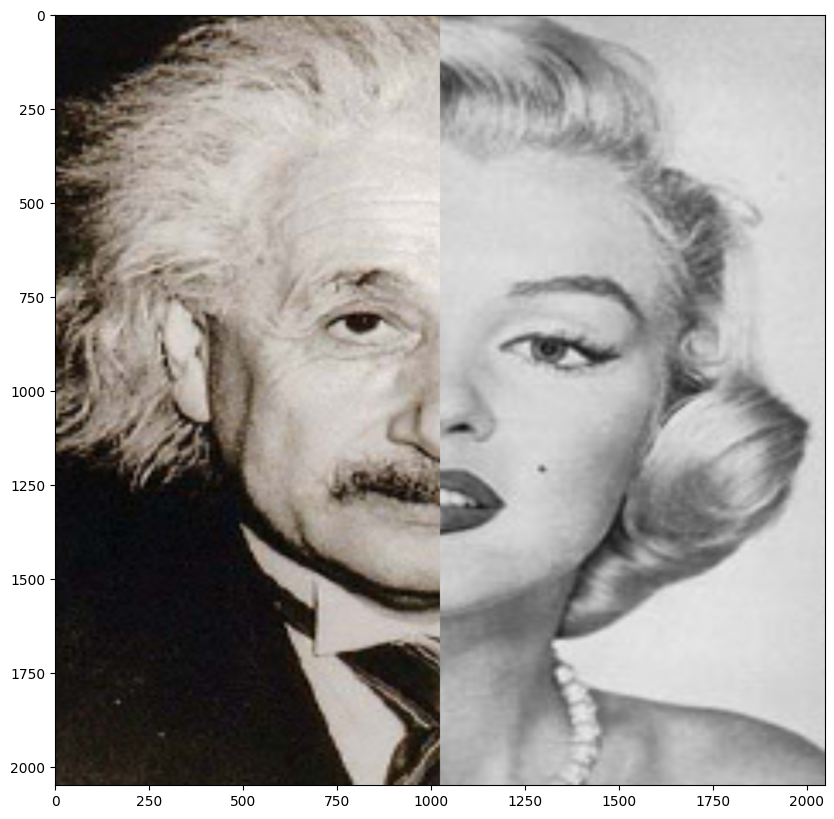

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(real);